In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#处理cement_label，水泥标签，里面含有水泥类型→one hot encodding。水泥强度→单独列出来。

In [3]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]

In [4]:
a =df.columns.tolist()

In [5]:
df['q_stone_sum'] = df['q_stone_1'] + df['q_stone_2'] + df['q_stone_3']
df['q_stone_1'] = df['q_stone_1'].map(lambda x: 1 if x != 0 else 0)
df['q_stone_2'] = df['q_stone_2'].map(lambda x: 1 if x != 0 else 0)
df['q_stone_3'] = df['q_stone_3'].map(lambda x: 1 if x != 0 else 0)
df['q_sand_sum'] = df['q_crushed_sand'] + df['q_non_crushed_sand']
df['q_crushed_sand'] = df['q_crushed_sand'].map(lambda x: 1 if x != 0 else 0)
df['q_non_crushed_sand'] = df['q_non_crushed_sand'].map(lambda x: 1 if x != 0 else 0)
df

,probe_index,name,weight_fresh,weight_at_test,size_x,size_y,size_z,age,density_fresh,density_at_test,...,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,slump.1,q_stone_sum,q_sand_sum
5,5,Atm_2010_0012_I,8030.0,NaN,151.5,149.6,150.0,28.0,2362.000906,0.000000,...,14.0,NaN,NaN,NaN,NaN,NaN,0.000000,14.0,1050.0,819.0
11,5,Atm_2010_0028_II,8050.0,NaN,151.5,149.6,150.0,28.0,2367.883847,0.000000,...,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5,1077.0,821.0
17,5,Atm_2010_0044_III,8160.0,NaN,151.5,149.6,150.0,28.0,2400.240024,0.000000,...,16.5,NaN,NaN,NaN,NaN,NaN,0.000000,16.5,1214.0,684.0
23,5,Atm_2010_0065_I,7840.0,7865.0,151.0,150.0,150.0,28.0,2307.579102,2314.937454,...,15.5,NaN,NaN,NaN,NaN,NaN,15.426049,15.5,1079.0,819.0
24,6,Atm_2010_0065_I,7910.0,7921.0,151.5,149.6,150.0,28.0,2326.703259,2329.938876,...,15.5,NaN,NaN,NaN,NaN,NaN,15.800109,15.5,1079.0,819.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,3,Vra_Zimni_0108_III,NaN,7465.0,149.5,150.0,150.0,28.0,0.000000,2219.249350,...,12.0,0.0,0.0,0.0,0.0,0.01,15.748495,12.0,890.0,855.0
7486,4,Vra_Zimni_0108_III,NaN,7450.0,150.0,149.6,149.6,28.0,0.000000,2219.227506,...,12.0,0.0,0.0,0.0,0.0,0.01,12.240642,12.0,890.0,855.0
7487,5,Vra_Zimni_0108_III,NaN,7690.0,150.0,149.8,149.8,28.0,0.000000,2284.606742,...,12.0,0.0,0.0,0.0,0.0,0.01,8.295060,12.0,890.0,855.0
7489,1,Vra_Zimni_0124_IV,NaN,7625.0,151.0,149.7,150.0,28.0,0.000000,2248.794867,...,16.0,0.0,0.0,0.0,0.0,0.01,21.916017,16.0,890.0,855.0


In [6]:
df['cement_label'] = df['cement_label'].astype(str)
df['CEM_id'] = df['cement_label'].apply(lambda x: 'CEM_I' if 'CEM_I_' in x else ('CEM_II' if 'CEM_II_' in x else ('CEM_III' if 'CEM_III_' in x else 'CEM_IV')))
One_Hot_encoded_df = pd.get_dummies(df['CEM_id'], prefix='CEM_id')
df['CEM_S'] = df['cement_label'].apply(lambda x: '42.5' if '42.5' in x else ('52.5' if '52.5' in x else ''))

df = pd.concat([df, One_Hot_encoded_df,], axis=1)

In [7]:
df.columns.tolist()

['probe_index',
 'name',
 'weight_fresh',
 'weight_at_test',
 'size_x',
 'size_y',
 'size_z',
 'age',
 'density_fresh',
 'density_at_test',
 'q_cement',
 'q_water',
 'id_cement',
 'cement_label',
 'sand_coarsness',
 'q_crushed_sand',
 'q_non_crushed_sand',
 'q_ash',
 'id_crushed_sand',
 'id_non_crushed_sand',
 'id_ash',
 'q_stone_1',
 'q_stone_2',
 'q_stone_3',
 'id_stone',
 'stone_type',
 'slump',
 'q_airentrain',
 'q_waterproofing',
 'q_retardant',
 'q_superplast',
 'q_plast',
 'compressive_strength',
 'slump.1',
 'q_stone_sum',
 'q_sand_sum',
 'CEM_id',
 'CEM_S',
 'CEM_id_CEM_I',
 'CEM_id_CEM_II',
 'CEM_id_CEM_III',
 'CEM_id_CEM_IV']

In [8]:
feature_columns = df[[ 'q_stone_sum','q_sand_sum','weight_fresh', 'weight_at_test','density_fresh','density_at_test','q_cement',
                   'q_water','id_cement','sand_coarsness', 'q_crushed_sand', 'q_non_crushed_sand', 'q_ash', 'cement_label',
                   'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'q_stone_1', 'q_stone_2', 'q_stone_3', 'id_stone', 
                   'q_airentrain', 'q_waterproofing', 'q_retardant', 'q_superplast', 'q_plast','CEM_S','CEM_id_CEM_I', 'stone_type',
                   'CEM_id_CEM_II','CEM_id_CEM_III','CEM_id_CEM_IV']]
#'probe_index', 'name','cement_label'，'q_crushed_sand', 'q_non_crushed_sand', 'q_ash','stone_type',

target_column1 = df['compressive_strength']  #'slump.1'
data1 = pd.concat([feature_columns,target_column1],axis=1)
data1_names = data1.columns.tolist()

In [9]:
'''from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)

feature_columns1 = selector.fit_transform(feature_columns)
feature_indexes = selector.get_support(indices=True)
#feature_columns = feature_columns.iloc[:, selected_feature_indexes]

#feature_columns_index = pd.DataFrame(feature_columns1,columns=feature_columns.columns)
feature_columns = feature_columns.iloc[:,feature_indexes]'''
columns_to_drop = ['weight_fresh', 'weight_at_test','density_at_test','q_stone_2','q_airentrain','sand_coarsness','CEM_id_CEM_I','CEM_S',
                   'q_stone_3','q_stone_1','q_crushed_sand','q_non_crushed_sand','CEM_id_CEM_III','q_waterproofing','CEM_id_CEM_IV',
                   'q_retardant']
for column in columns_to_drop:
    del feature_columns[column]
feature_columns = pd.concat([feature_columns,target_column1],axis=1)
feature_columns = feature_columns[(feature_columns['density_fresh'] < 3000)  & (feature_columns['compressive_strength'] > 1)
                                 &(feature_columns['density_fresh'] > 1500) ]

target_column1 = feature_columns['compressive_strength']
######################################################################################################
column_names = feature_columns.columns.tolist()
print(column_names)

['q_stone_sum', 'q_sand_sum', 'density_fresh', 'q_cement', 'q_water', 'id_cement', 'q_ash', 'cement_label', 'id_crushed_sand', 'id_non_crushed_sand', 'id_ash', 'id_stone', 'q_superplast', 'q_plast', 'stone_type', 'CEM_id_CEM_II', 'compressive_strength']


In [10]:
roman_numeral_map = { 'I': 1, 'II':2, 'III': 3, 'IV': 4, 'N':1, 'R':2, 'N-SR':3, 'N/A-L':4, 'N/A-LL':5, 'N/B-M':6, 
                     'N/B-V':7, 'R/A-L':8, 'R/A-LL':9, 'R/A-M':10, 'R/B-LL':11, 'R/B-M':12, 'N/A-LH':13, 'N/A-S':14, 
                     'N-SR/A-S':15, 'N-SR/B-V':16
                    }
def format_date(type_string_list):
    num = np.zeros((len(type_string_list), 1))
    i=0
    for type_string in type_string_list:
     parts = type_string.split('_')
     feature1 = 100*roman_numeral_map.get(parts[1], None)
     feature2 = float(parts[2])
     feature3 = 0.001*roman_numeral_map.get(parts[3], None)
     num[i] = feature1+feature2+feature3
     i+=1
    return num

numeric_data = format_date(feature_columns['cement_label'])
feature_columns['cement_label']= numeric_data
    
feature_columns = feature_columns.copy() 
feature_columns['stone_type'] = feature_columns['stone_type'].replace({'river_stone': 2, 'crushed_stone': 1,'':0})
feature_columns.fillna(0, inplace=True)
feature_columns.replace('', 0, inplace=True)



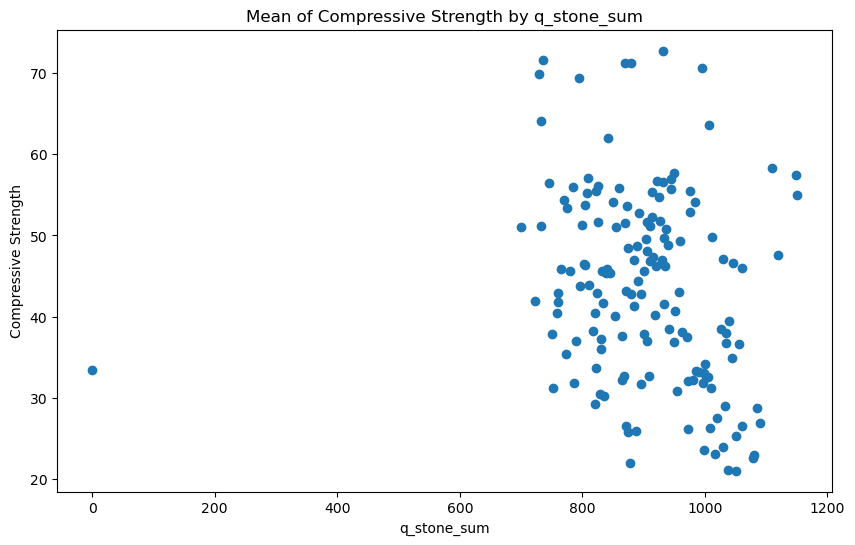

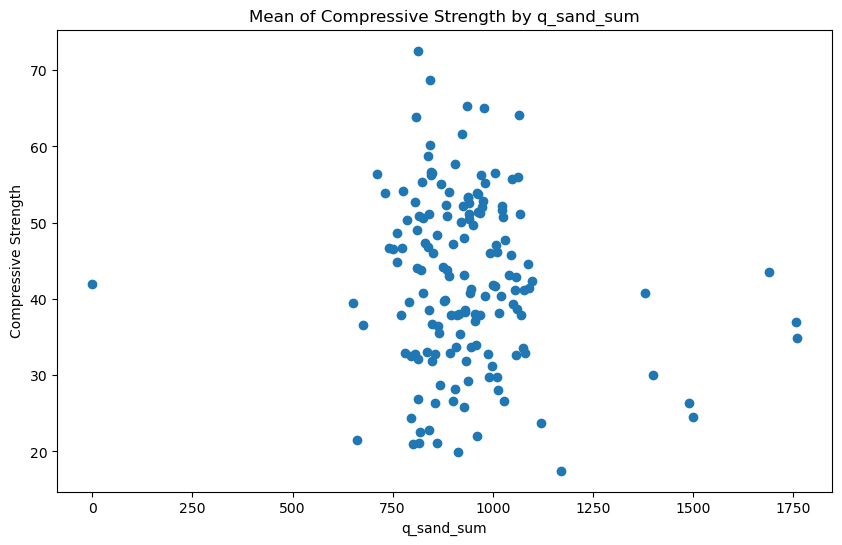

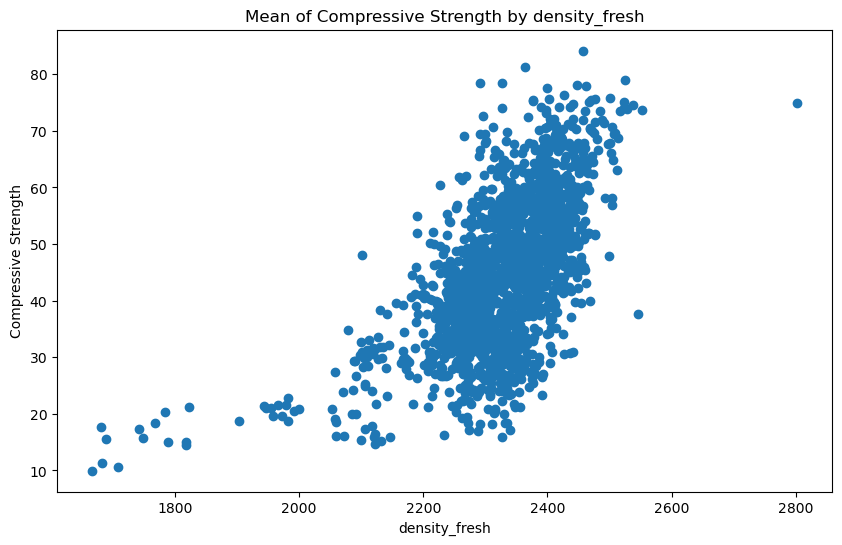

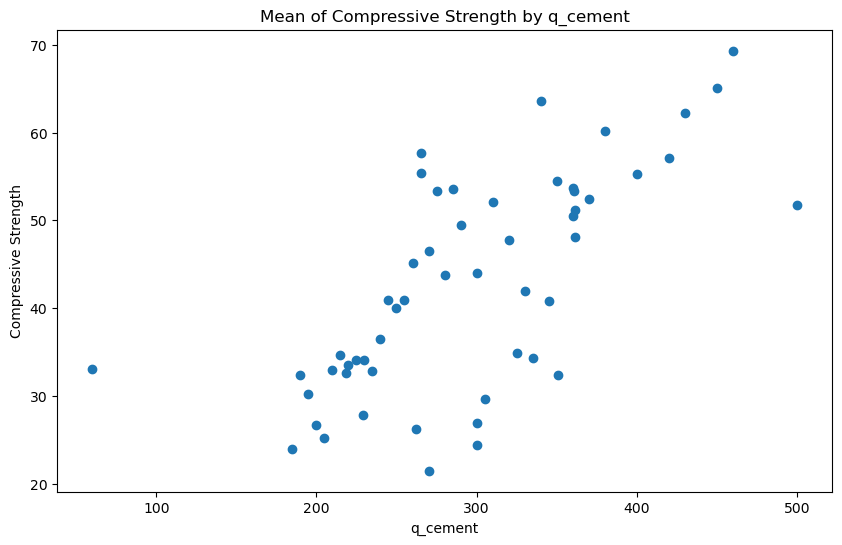

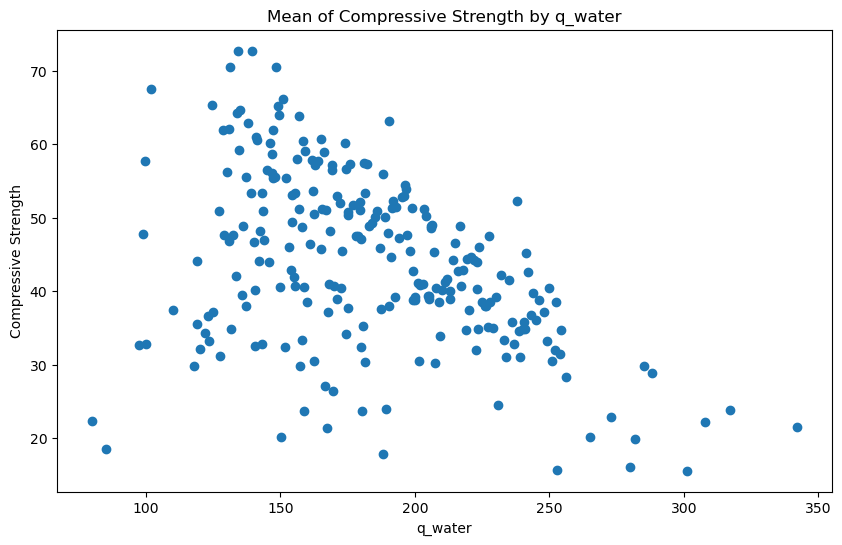

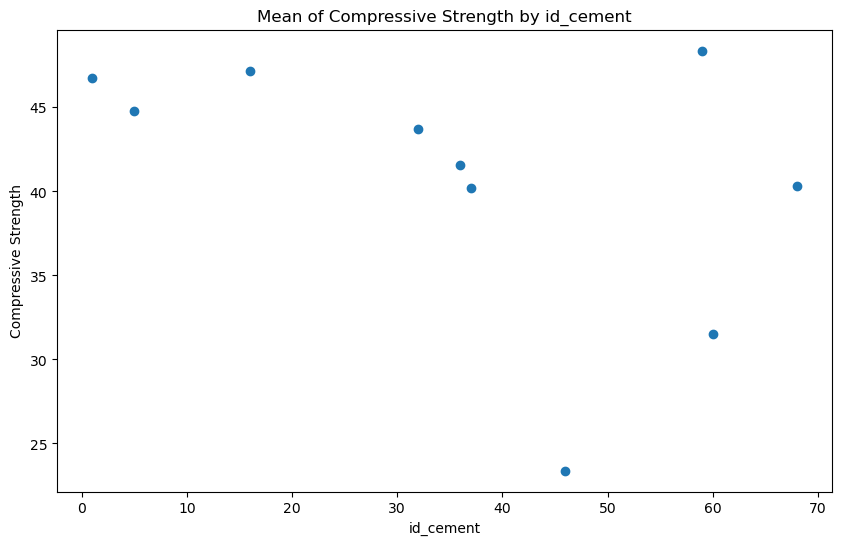

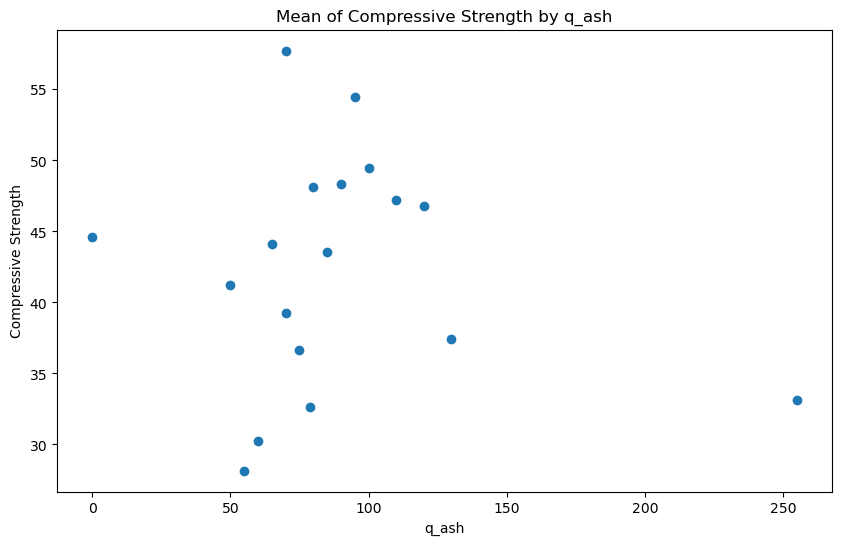

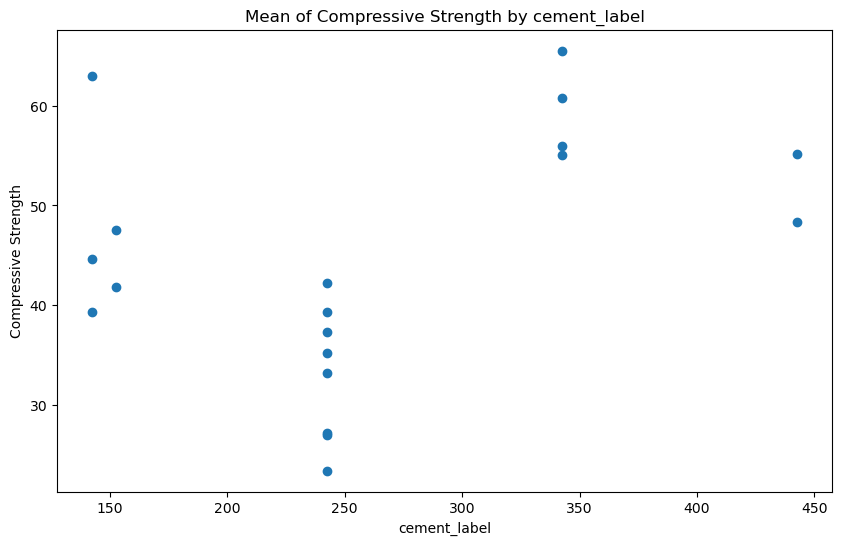

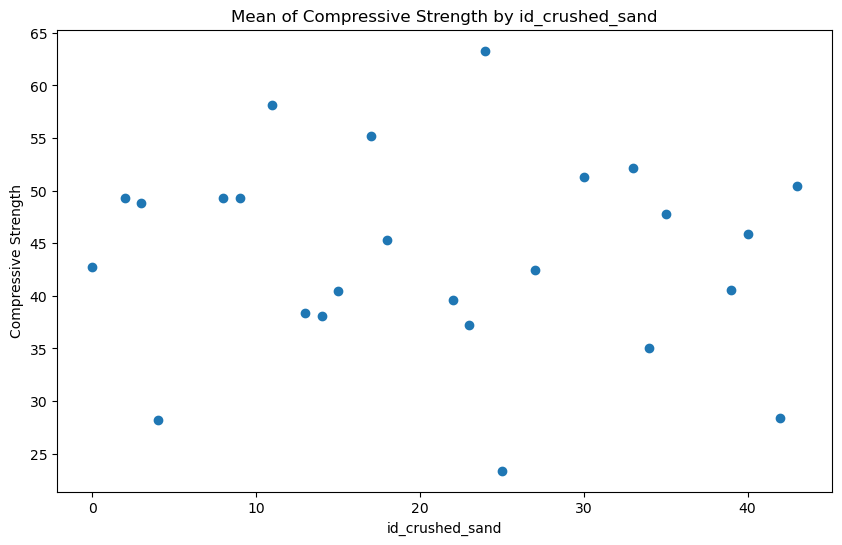

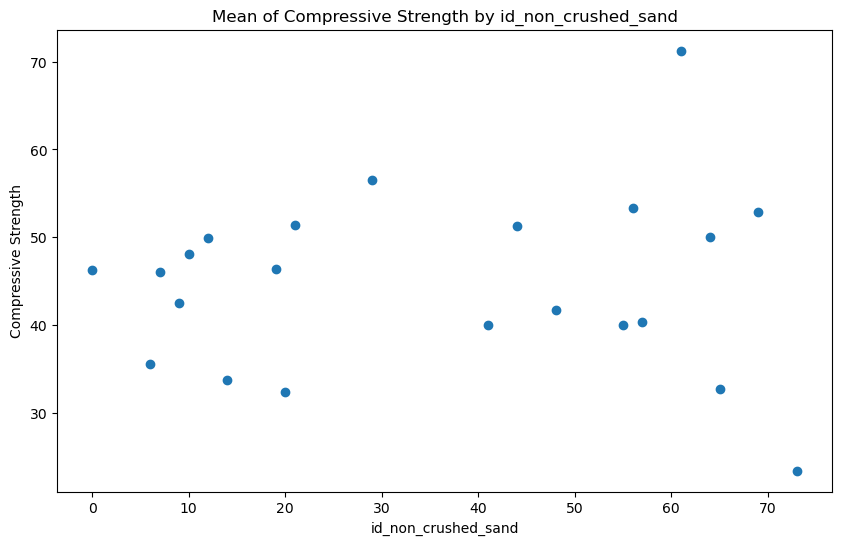

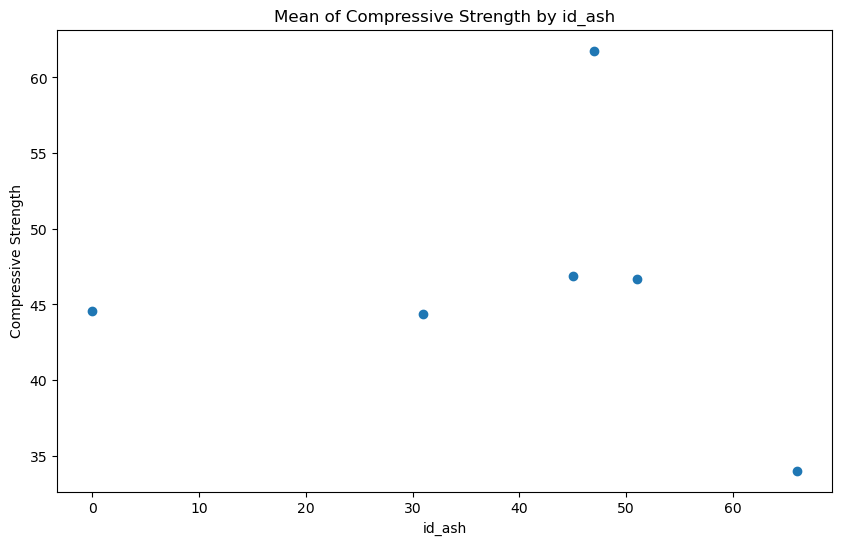

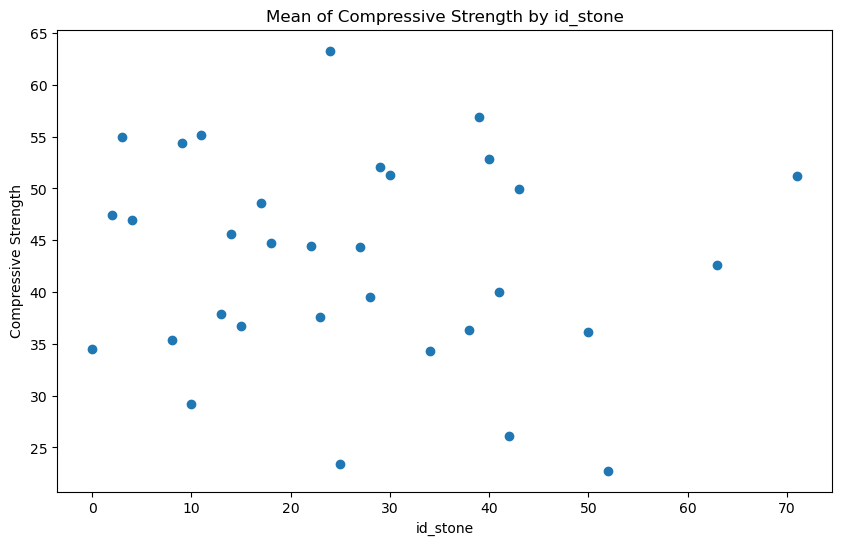

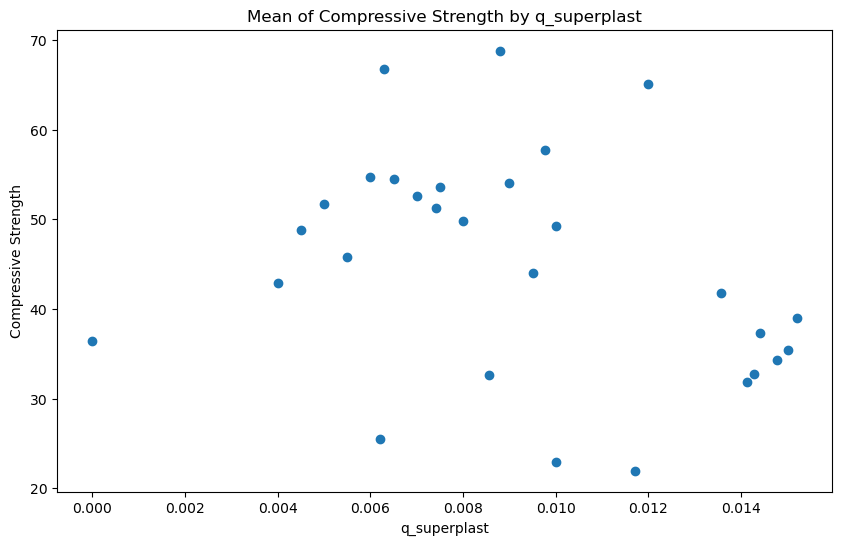

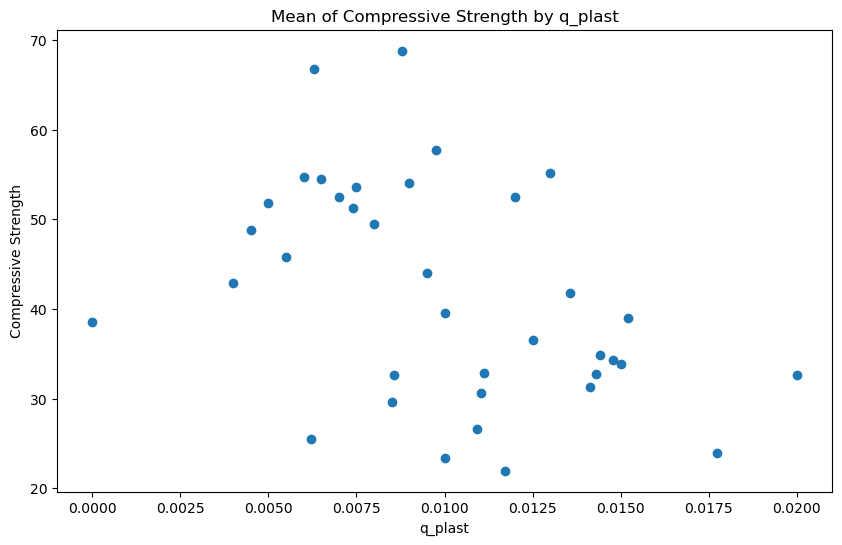

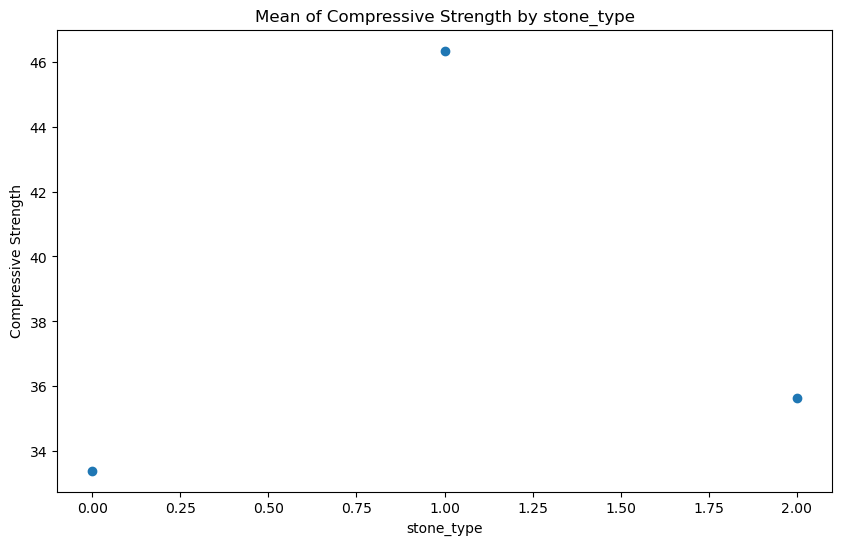

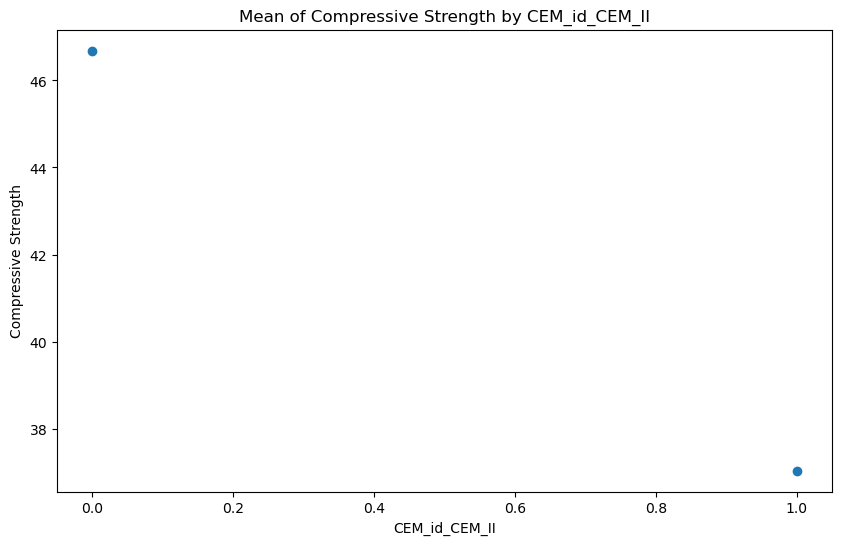

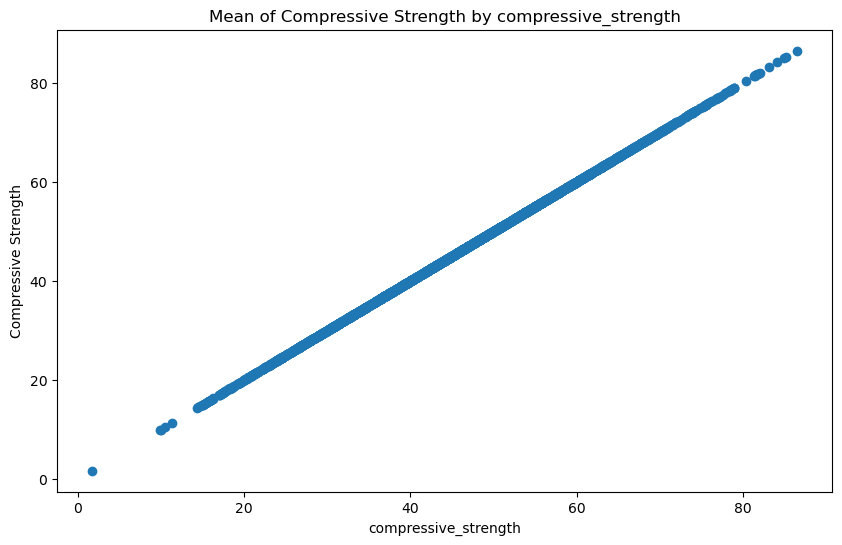

In [11]:
for feature in feature_columns:
    feature_mean = feature_columns.groupby(feature)['compressive_strength'].mean()

    plt.figure(figsize=(10, 6))  # 调整图片大小
    plt.scatter(feature_mean.index, feature_mean.values)
    plt.xlabel(feature)
    plt.ylabel('Compressive Strength')
    plt.title('Mean of Compressive Strength by ' + feature)
    plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
nan_columns = feature_columns.columns[feature_columns.isna().any()].tolist()
print('nan_columns:',nan_columns)


nan_columns: []


In [13]:
'''feature_columns['sand_coarsness'].fillna(0, inplace=True)
feature_columns = feature_columns.dropna(axis=0,subset=['id_ash', 'id_stone'])
feature_columns['sand_coarsness'] = feature_columns['sand_coarsness'].map(lambda x: 1 if x > 0 else x)#########修正列
#feature_columns '''

"feature_columns['sand_coarsness'].fillna(0, inplace=True)\nfeature_columns = feature_columns.dropna(axis=0,subset=['id_ash', 'id_stone'])\nfeature_columns['sand_coarsness'] = feature_columns['sand_coarsness'].map(lambda x: 1 if x > 0 else x)#########修正列\n#feature_columns "

In [14]:
X = feature_columns.drop('compressive_strength',axis=1)
y = feature_columns['compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
regr = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#y_pred

In [15]:
std_deviation = np.std(y_pred - y_test)
std_deviation       #标准差
variance = np.var(y_pred - y_test)
variance            #方差

16.275171048822077

In [16]:
std_deviation 

4.034249750427219

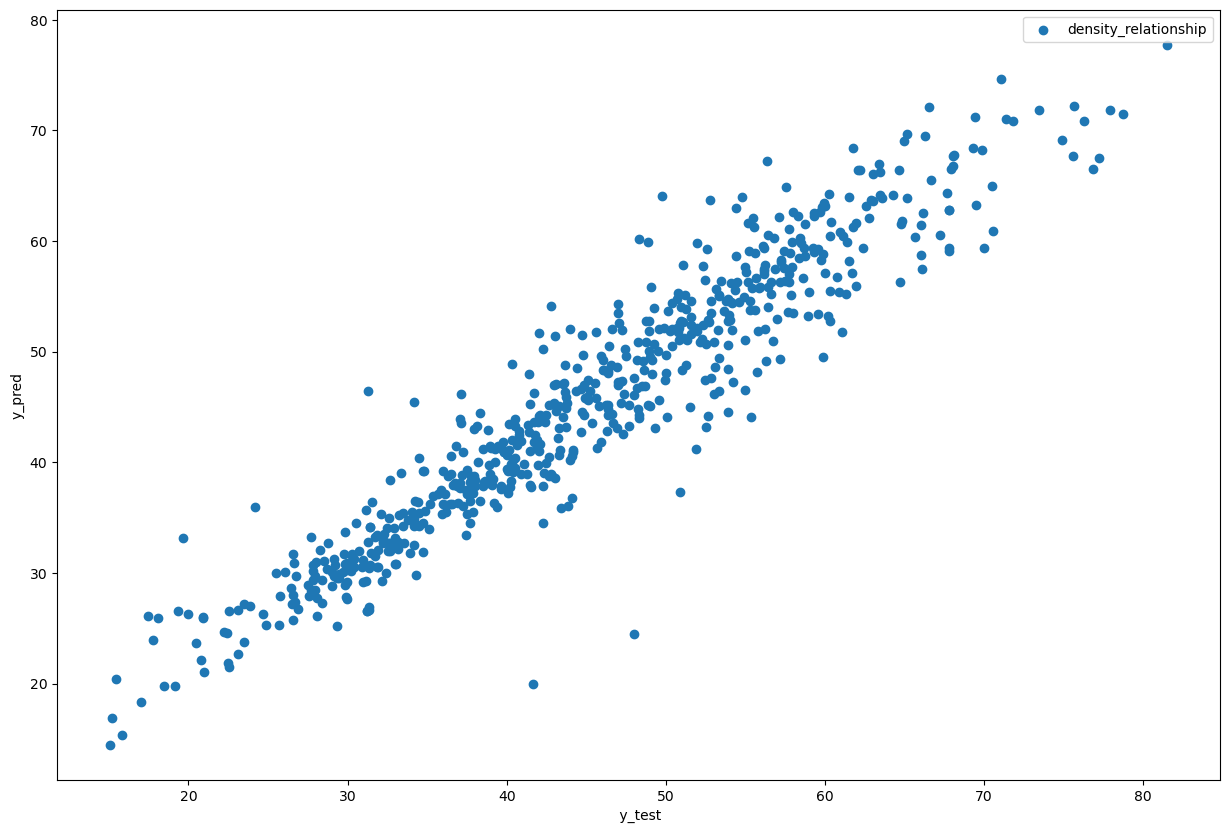

In [17]:
plt.figure(figsize=(15, 10))

plt.scatter( y_test,y_pred,label='density_relationship')
plt.xlabel(' y_test')
plt.ylabel('y_pred')
plt.legend()

In [18]:
feature_importances = regr.feature_importances_
names = X_train.columns

# 将特征名称和重要性值对应起来
feature_importances = pd.DataFrame({'Feature': names, 'Importance': feature_importances})

# 按重要性降序排列
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# 打印特征重要性
print(feature_importances)


                Feature  Importance
2         density_fresh    0.196189
3              q_cement    0.182583
12         q_superplast    0.155315
4               q_water    0.099230
0           q_stone_sum    0.054503
13              q_plast    0.052247
1            q_sand_sum    0.044792
6                 q_ash    0.037126
9   id_non_crushed_sand    0.030571
8       id_crushed_sand    0.029889
15        CEM_id_CEM_II    0.027337
11             id_stone    0.024668
7          cement_label    0.022988
10               id_ash    0.015796
5             id_cement    0.014113
14           stone_type    0.012652


In [19]:
useless_feature = [feature_name for index, (feature_name, importance) in feature_importances.iterrows() if importance <= 0.01]
useless_feature

[]

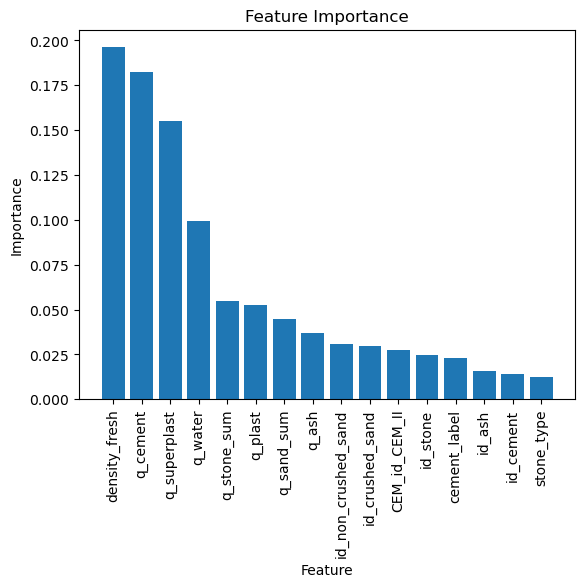

In [20]:
#plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [21]:
# 模型无法识别出大部分列的信息， 需要调整数据 从水到石头
# feature_columns

In [22]:
feature_columns

,q_stone_sum,q_sand_sum,density_fresh,q_cement,q_water,id_cement,q_ash,cement_label,id_crushed_sand,id_non_crushed_sand,id_ash,id_stone,q_superplast,q_plast,stone_type,CEM_id_CEM_II,compressive_strength
23,1079.00,819.0,2307.579102,225.0,252.80,60.0,75.00,142.502,0.0,65.0,31.0,52.0,0.000000,0.000000,1.0,0,15.426049
24,1079.00,819.0,2326.703259,225.0,252.80,60.0,75.00,142.502,0.0,65.0,31.0,52.0,0.000000,0.000000,1.0,0,15.800109
30,1079.00,819.0,2275.555556,225.0,212.00,60.0,75.00,142.502,0.0,65.0,31.0,52.0,0.000000,0.010000,1.0,0,23.528889
31,1079.00,819.0,2275.698158,225.0,212.00,60.0,75.00,142.502,0.0,65.0,31.0,52.0,0.000000,0.010000,1.0,0,24.545455
37,1079.00,819.0,2281.481481,300.0,220.00,60.0,0.00,142.502,0.0,65.0,0.0,52.0,0.000000,0.010000,1.0,0,27.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,949.90,906.1,2367.407407,265.3,99.60,16.0,70.20,152.501,3.0,19.0,31.0,2.0,0.009765,0.009765,1.0,0,55.720000
7466,909.25,1058.0,2306.666667,218.5,97.25,16.0,78.75,152.501,3.0,19.0,31.0,2.0,0.008562,0.008562,1.0,0,32.093333
7467,909.25,1058.0,2322.962963,218.5,97.25,16.0,78.75,152.501,3.0,19.0,31.0,2.0,0.008562,0.008562,1.0,0,33.111111
7468,909.25,1058.0,2322.147651,218.5,97.25,16.0,78.75,152.501,3.0,19.0,31.0,2.0,0.008562,0.008562,1.0,0,32.308725


In [27]:
useless_feature = [feature_name for index, (feature_name, importance) in feature_importances.iterrows() if importance <= 0.01]
useless_feature

[]

In [28]:
X_train1 = X_train.drop(columns=useless_feature)
X_test1 = X_test.drop(columns=useless_feature)

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train1)
X1_test  = scaler.fit_transform(X_test1)
X1_train = pd.DataFrame(X1_train, columns=X_train1.columns)
X1_test  = pd.DataFrame(X1_test, columns=X_test1.columns)

In [75]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
mlp = MLPRegressor(hidden_layer_sizes=(50,50,), activation='tanh', random_state=42,
                   alpha=0.0005, batch_size=64, learning_rate='constant',
                   learning_rate_init=0.05, solver='adam',max_iter=1500)

mlp.fit(X1_train, y_train)

y1_train = mlp.predict(X1_train)
mse_train = mean_squared_error(y1_train, y_train)
rmse_train = np.sqrt(mse_train)

y1_pred = mlp.predict(X1_test)
mse_test = mean_squared_error(y1_pred, y_test)
rmse_test = np.sqrt(mse_test)

print("训练集均方误差 (MSE)：", mse_train)
print("训练集均方根误差 (RMSE)：", rmse_train)

print("测试集均方误差 (MSE)：", mse_test)
print("测试集均方根误差 (RMSE)：", rmse_test)

训练集均方误差 (MSE)： 17.45689482795697
训练集均方根误差 (RMSE)： 4.178144902699877
测试集均方误差 (MSE)： 22.579752383285854
测试集均方根误差 (RMSE)： 4.751815693320381


In [ ]:
y1_train= mlp.predict(X1_train)
mse = mean_squared_error(y1_train,  y_train)
rmse = np.sqrt(mse)
mse

In [ ]:
'''from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# 创建Lasso模型并设置L1正则化强度alpha
lasso = Lasso(alpha=0.0005, random_state=42,hidden_layer_sizes=(40,40,40), activation='tanh', random_state=42,
              learning_rate_init=0.01, solver='adam',max_iter=1500)

# 使用训练数据进行模型训练
lasso.fit(X1_train, y_train)

# 在训练集上进行预测
y1_train_pred = lasso.predict(X1_train)

# 在测试集上进行预测
y1_pred = lasso.predict(X1_test)

# 计算均方误差和均方根误差
mse_train = mean_squared_error(y_train, y1_train_pred)
rmse_train = np.sqrt(mse_train)
mse_test = mean_squared_error(y_test, y1_pred)
rmse_test = np.sqrt(mse_test)

print("训练集均方误差 (MSE)：", mse_train)
print("训练集均方根误差 (RMSE)：", rmse_train)
print("测试集均方误差 (MSE)：", mse_test)
print("测试集均方根误差 (RMSE)：", rmse_test)'''

In [73]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [ (40,40),(50,50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0005, 0.001, 0.00005],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.01, 0.05, 0.1],
    'solver': ['adam', 'sgd'],
    'batch_size': [64],
}

mlp = MLPRegressor(random_state=42, max_iter=1500)
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X1_train, y_train)

# 输出最佳超参数配置
print("最佳超参数：", random_search.best_params_)

# 使用最佳超参数的模型进行预测
y_pred = random_search.predict(X1_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)

C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 742, in fit
    return self._fit(X, y, incremental=False)
  File "C:\ProgramData\anaconda3\envs\Learning\lib\site-packages\sklearn\neural_network\_multilayer_perce

最佳超参数： {'solver': 'adam', 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 50), 'batch_size': 64, 'alpha': 0.0005, 'activation': 'tanh'}
均方误差 (MSE): 20.997916313731487
均方根误差 (RMSE): 4.58234834050528


In [ ]:
{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 64, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)

In [ ]:
'''from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

X1 = feature_columns.drop(['compressive_strength', 'q_cement', 'density_fresh', 'q_water'], axis=1)#, 'q_cement', 'density_fresh', 'q_water'
y1 = feature_columns['compressive_strength']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# 定义超参数网格
param_grid = {
    'hidden_layer_sizes': [(30,30,30),(20,20,20),(40,40,40)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.0001],
    'batch_size': [32, 64, 128]
}

# 使用网格搜索进行超参数调优
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X1_train, y1_train)

# 输出最佳超参数配置
print("最佳超参数：", grid_search.best_params_)

# 使用最佳超参数的模型进行预测
y_pred = grid_search.predict(X1_test)

# 评估模型性能
mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)'''

In [ ]:
'''param_grid = {
    'hidden_layer_sizes': [(40,),(60,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0005,0.0008, 0.001, 0.005,0.008,0.0001,0.0002],
    'batch_size': [16, 24, 32,48, 64]
}

grid_search = GridSearchCV(mlp, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("最佳超参数：", grid_search.best_params_)
y_pred = grid_search.predict(X_test)

# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)'''

In [ ]:
'''最佳超参数： {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
均方误差 (MSE): 51.04101318809957
均方根误差 (RMSE): 7.144299348998443'''

In [ ]:
'''plt.figure(figsize=(12, 6))  # 调整图片大小
plt.scatter(feature_columns['q_water'], feature_columns['compressive_strength'],c=feature_columns['id_cement'])
plt.xlabel('q_water')

plt.ylabel('Compressive Strength')
plt.title('q_water+Compressive Strength')
plt.show()'''

In [ ]:
#id_cement重新做  sand_coarsness布尔化'q_crushed_sand','q_non_crushed_sand'还有些石头ash不知道啥关系，计划和id一起组成二维向
#（onehot不行）放弃

In [ ]:
columns_to_analyze = feature_columns.columns.tolist()
#columns_to_analyze

In [ ]:
#feature_columns['sand_coarsness'] = feature_columns['sand_coarsness'].map(lambda x: 1 if x > 0 else x)

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'n_estimators': [20, 50, 80,100],  # 决策树数量
    'max_depth': [None,1, 2],  # 最大深度
    'min_samples_split': [1, 2, 3],  # 节点分裂的最小样本数
    'min_samples_leaf': [1, 2, 3],  # 叶节点的最小样本数
    'max_features': ['sqrt', 'log2','auto']  # 特征数量
}
grid_search = GridSearchCV(estimator=regr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)'''

In [ ]:
'''print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)

# 在测试集上评估模型的性能
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)'''

In [ ]:
'''Best Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  20.448056703196244
Mean Squared Error:  19.246098896936527'''

In [ ]:
#sns.pairplot(data=feature_columns, hue='compressive_strength')

In [ ]:
from sklearn.neural_network import MLPRegressor
data = feature_columns
X1 = data.drop(['compressive_strength', 'q_cement', 'density_fresh', 'q_water', 'q_ash'], axis=1)
y1 = data['compressive_strength']
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPRegressor())
])

param_grid = {
    'model__activation': ['tanh'],
    'model__alpha': [0.01],
    'model__hidden_layer_sizes': [(50, 50)],
    'model__solver': ['sgd']
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

best_model = grid_search.best_estimator_
y_pred1 = best_model.predict(X_test1)
mse = np.mean((y_pred1 - y_test1) ** 2)

print('均方误差（MSE）:', mse)
print('最佳参数:', grid_search.best_params_)


In [ ]:
data = feature_columns
X1 = data.drop(['compressive_strength', 'q_cement', 'density_fresh', 'q_water', 'q_ash'], axis=1)
y1 = data['compressive_strength']
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
model = MLPRegressor(activation='tanh')

pipeline = Pipeline([('scaler', scaler), ('model', model)])

pipeline.fit(X_train1, y_train1)

# 定义超参数的搜索空间
param_grid = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam', 'sgd'],
    'model__alpha': [0.0001, 0.001, 0.01],
}

# 使用网格搜索进行超参数调节
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train1, y_train1)

# 获取最佳模型和最佳参数
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
'''# 在测试数据上进行预测
y_pred1 = best_model.predict(X_test1)
mse = np.mean((y_pred1 - y_test1) ** 2)'''
print('均方误差（MSE）:', mse)
print('最佳参数:', best_params)

In [ ]:
cement_ids = feature_columns['id_cement'].unique()
cement_ids

In [ ]:
'''plt.figure(figsize=(18, 6))  # 调整图片大小
plt.scatter(df['size_x'], df['q_water'],)
plt.xlabel('q_water')

plt.ylabel('Compressive Strength')
plt.title('q_water+Compressive Strength')
plt.show()'''

In [ ]:
'''def get neural parameter before split
    from sklearn.preprocessing import StandardScaler
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    data = feature_columns
    X1 = data.drop('compressive_strength', axis=1)
    y1 = data['compressive_strength']
    scaler = StandardScaler()
    X1 = scaler.fit_transform(X1)
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred - y_test) ** 2)
print('均方误差（MSE）:', mse)'''

In [ ]:
self.W1 = np.random.randn(input_size, hidden_size)
self.b1 = np.zeros((1, hidden_size))
self.W2 = np.random.randn(hidden_size, output_size)
self.b2 = np.zeros((1, output_size))
self.W1